In [13]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pylab as plt
plt.style.use('seaborn')
import json
import requests
import os
from dotenv import load_dotenv
load_dotenv()

start = datetime(2018, 1, 1)
end = datetime(2021, 7, 1)


# Federal Reserve Economic Data (FRED)

*FRED is the most comprehensive, free respository for US economic time series data. It has more than half a million economic times series from 87 sources, including government agencies such as the U.S. Census and the Bureau of Labor Statistics. It covers banking, business/fiscal, consumer price indexes, employment and population, exchange rates, gross domestic product, interest rates, monetary aggregates, producer price indexes, reserves and monetary base, U.S. trade and international transactions, and U.S. financial data.*

*See all the time series here: https://fred.stlouisfed.org/*

---

In [14]:
inflation = pdr.DataReader('T5YIE', 'fred', start, end)
inflation.plot(figsize=(20,5), title='Inflation expectation rate')
plt.show()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yfinance/multi.py", line 169, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yfinance/multi.py", line 181, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/py

KeyboardInterrupt: 

# Alpha Vantage
*Repository of free APIs for upto the minute streaming data and 20 years of historical data . APIs are grouped into four categories: 1. Equity 2. Currencies (including cryptocurrencies) 3. Sectors and 4. Technical indicators. Run by a tight-knit community of researchers, engineers, and business professionals. JSON is the default data format with CSV format also supported.*

*Data from this source requires extensive processing before it can used in financial data analysis. The 'Processing Data' workbook focuses on this data source and the steps required to clean the the data. Below are the final lines of code that you could use to get clean data for your analysis.*

*You can find the API documentation here: https://www.alphavantage.co/documentation/* 

---



In [ ]:
key = os.environ.get('ALPHA_VANTAGE_KEY')
path = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey={key}'

response = requests.get(path)
alphadict = json.loads(response.text)
eur = pd.DataFrame(alphadict['Time Series FX (Daily)']).T
eur.index = pd.to_datetime(eur.index)
eur = eur.sort_index(ascending=True)
eur.columns = ['open', 'high', 'low', 'close']
eur = eur.astype(float)
eur.head()


,open,high,low,close
2021-03-02,1.20484,1.20945,1.1990,1.20900
2021-03-03,1.20893,1.21133,1.2041,1.20634
2021-03-04,1.20624,1.20666,1.1960,1.19688
2021-03-05,1.19679,1.19777,1.1892,1.19079
2021-03-08,1.19170,1.19324,1.1842,1.18460


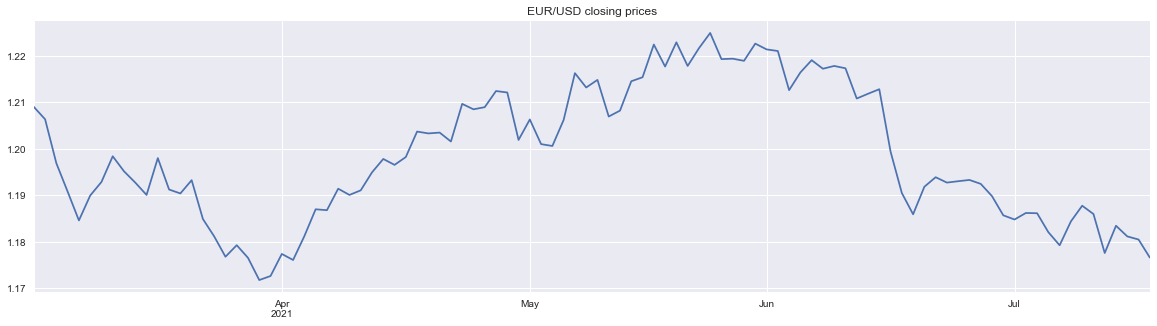

(<AxesSubplot:title={'center':'EUR/USD closing prices'}>, None)

In [ ]:
eur['close'].plot(figsize=(20, 5), title='EUR/USD closing prices'), plt.show()

# Yahoo Finance
*This is probably the oldest data source of free financial information. It has a vast repository of historical data that cover most traded securities worldwide. There is a pandas datareader that requires a bug fix which is provided below. However, the API is not reliable and will not return data sometimes. You just have to be patient and try again later.*


*https://finance.yahoo.com*

---



In [ ]:
import yfinance as yf
yf.pdr_override()
stock = pdr.get_data_yahoo('AMZN', start, end)
stock.head()


# Quandl
*A one stop shop for economic, financial and sentiment data some of it is offered for free and most others for a fee. Quandl sources data from over half a million publishers worldwide. It was  acquired by NASDAQ in 2018. It sources freely available public sources like FRED and private sources of alternative data. Many freely available data, such as historical equity data, are offered for a fee.*

*See API documentation here: https://docs.quandl.com/*

---



In [ ]:
import quandl
quandl.ApiConfig.api_key = os.environ.get('QUANDL_KEY')
investor_sentiment = quandl.get('AAII/AAII_SENTIMENT', start_date=start, end_date=end)
investor_sentiment['Bull-Bear Spread'].plot(figsize=(20, 5), title='American Association of Individual Investor bull-bear spread sentiment'), plt.show()
investor_sentiment.head()

consumer_sentiment = quandl.get('UMICH/SOC1', start_date=start, end_date=end)
consumer_sentiment.plot(figsize=(20, 5), title='University of Michigan consumer sentiment index'), plt.show()

spx = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date=start, end_date=end)
spx.plot(figsize=(20, 5),title='Trailing twelve months Price to Earning ratio of S&P 500 companies'), plt.show()
spx.tail()


# IEX Cloud
*The Investors Exchange (IEX) was founded by Brad Katsuyama, hero of the book 'Flash Boys' by Michael Lewis. IEX recently launced IEX Cloud, a new platform provides market and fundamental data for free and for a fee. The default data format is JSON.*

*For more information about the APIs, see: https://iexcloud.io/docs/api/#introduction*

---



In [15]:
key = os.environ.get('IEX_CLOUD_KEY')
response = requests.get(f'https://sandbox.iexapis.com/stable/stock/aapl/financials?token={key}')
jdictionary = json.loads(response.text)
financials = pd.DataFrame(jdictionary['financials'])
financials


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Electronic Data Gathering, Analysis, and Retrieval system (EDGAR)
*Comprehensive repository about companies, both domestic and foreign, who are required by law to file several forms like 10K and 10Q. Third-party filings with respect to these companies, such as tender offers and Schedule 13D filings, are also filed via EDGAR. Not all SEC filings by public companies are available on EDGAR. Companies were phased in to EDGAR filing over a three-year period, ending 6 May 1996. Information is copious and needs to be parsed.*

*For more information go here: https://www.sec.gov/edgar/searchedgar/accessing-edgar-data.htm*

*Edgar API information: https://pypi.org/project/edgar/*



In [ ]:
from edgar import Company, TXTML
company = Company("Oracle Corp", "0001341439")
doc = company.get_10K()
text = TXTML.parse_full_10K(doc)
print(text)
